<a href="https://colab.research.google.com/github/KacaU-lab/CodersLab-Vizualization/blob/main/bakery_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from google.colab import drive

## Sales at The Bread Basket bakery



In this notebook we will be visualizing the 2016-2017 sales data at *The Bread Basket* bakery in Edinburgh.

The data comes from the set published at [kaggle](https://www.kaggle.com/akashdeepkuila/bakery) with the *CC0* license.

Let's get familiar with the content of the notebook and follow the instructions to prepare the data that we are going to need during classes.

**Note!** When you come back to the document later, remember to re-run the code cells.

### Dataset contents

In the **bakery_sales.csv** file imported below there are 20 507 items assigned to 9 684 client transactions with the information on:


*   **TransactionNo** - transaction number
*   **Items** - purchased items
*   **DateTime** - time of transaction
*   **Daypart** - time of the day
*   **DayType** - weekday or weekend.

The necessary data is provided with the document: the code below imports the files we need.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import glob

# Prohledej celý Drive a najdi všechny soubory, které obsahují slovo "bakery"
for path in glob.glob("/content/drive/**/bakery*", recursive=True):
    print(path)

/content/drive/MyDrive/Colab Notebooks/bakery sales.ipynb
/content/drive/MyDrive/Colab Notebooks/Vis/Bakery Data/bakery sales.ipynb
/content/drive/MyDrive/Colab Notebooks/Vis/Bakery Data/bakery_sales.csv


In [6]:
import pandas as pd

PATH = "/content/drive/MyDrive/Colab Notebooks/Vis/Bakery Data/bakery_sales.csv"
bakery_data = pd.read_csv(PATH)

print(f"[OK] Soubor načten: {PATH}")
print(f"Tvar: {bakery_data.shape[0]} řádků × {bakery_data.shape[1]} sloupců")

bakery_data.head()

[OK] Soubor načten: /content/drive/MyDrive/Colab Notebooks/Vis/Bakery Data/bakery_sales.csv
Tvar: 20507 řádků × 5 sloupců


,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,30/10/2016 9:58,Morning,Weekend
1,2,Scandinavian,30/10/2016 10:05,Morning,Weekend
2,2,Scandinavian,30/10/2016 10:05,Morning,Weekend
3,3,Hot chocolate,30/10/2016 10:07,Morning,Weekend
4,3,Jam,30/10/2016 10:07,Morning,Weekend


## Notebook preparation

We want to start by making sure that the data has been correctly identified and make necessary conversions.

Based on data overview, we expect the first column to contain consecutive integers; the second one: names of sold products; third: the data identified as time-based; and the last two columns should have text-based information.

### Checking data types

Below, we need to run the listed instructions to get the DataFrames used during classes.

First let's check how the data was identified on import.

In [7]:
# Checking data types
bakery_data.dtypes.to_frame("dtype")

,dtype
TransactionNo,int64
Items,object
DateTime,object
Daypart,object
DayType,object


Let's make sure the data has records with missing information for any of the columns.

In [8]:
# Rows with all columns present vs total
complete = bakery_data.dropna(how="any").shape[0]
total = len(bakery_data)
f"complete records: {complete}; total records: {total}"

'complete records: 20507; total records: 20507'

Let's also take a look at what data is really hidden under the **object** type for each of the columns.

In [9]:
# Inspect Python-level types hidden under 'object' dtype
for column in bakery_data.columns:
    if bakery_data[column].dtype == "object":
        check_types = bakery_data[column].apply(lambda x: type(x).__name__)
        print(f"--- {column} ---")
        print(check_types.value_counts(), "\n")

--- Items ---
Items
str    20507
Name: count, dtype: int64 

--- DateTime ---
DateTime
str    20507
Name: count, dtype: int64 

--- Daypart ---
Daypart
str    20507
Name: count, dtype: int64 

--- DayType ---
DayType
str    20507
Name: count, dtype: int64 



#### Date conversion

In the case of transaction time it is by default identified as a *string*.

Let's change the **DateTime** column data to *timestamp*.

In [10]:
# Convert DateTime column to datetime type
bakery_data["DateTime"] = pd.to_datetime(bakery_data["DateTime"])

print("[OK] Sloupec 'DateTime' byl převeden na typ datetime")
bakery_data.dtypes.to_frame("dtype").loc[["DateTime"]]

[OK] Sloupec 'DateTime' byl převeden na typ datetime


/tmp/ipython-input-2724210156.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  bakery_data["DateTime"] = pd.to_datetime(bakery_data["DateTime"])


,dtype
DateTime,datetime64[ns]


We'll add a new column with translation date, callled **Date** and validate the conversion.

In [11]:
# Extract date from DateTime and create new column 'Date'
bakery_data["Date"] = bakery_data["DateTime"].dt.date

print("[OK] Přidán nový sloupec 'Date' obsahující pouze datum")
bakery_data[["DateTime", "Date"]].head()

[OK] Přidán nový sloupec 'Date' obsahující pouze datum


,DateTime,Date
0,2016-10-30 09:58:00,2016-10-30
1,2016-10-30 10:05:00,2016-10-30
2,2016-10-30 10:05:00,2016-10-30
3,2016-10-30 10:07:00,2016-10-30
4,2016-10-30 10:07:00,2016-10-30


In [12]:
# Check value counts for Date column
bakery_data["Date"].value_counts().head(10)

,count
Date,
2017-04-02,292
2016-05-11,275
2017-04-03,257
2017-03-25,246
2017-01-28,237
2017-02-18,227
2016-12-11,221
2016-11-19,209
2017-08-04,205


Because we are not going to use the information about time, in **bakery_data** we can leave just the column with the date.

In [13]:
# Keep only relevant columns
bakery_data = bakery_data[["TransactionNo", "Items", "Date", "Daypart", "DayType"]]

print("[OK] Sloupec 'DateTime' byl odstraněn. Zachovány pouze potřebné sloupce:")
bakery_data.head()

[OK] Sloupec 'DateTime' byl odstraněn. Zachovány pouze potřebné sloupce:


,TransactionNo,Items,Date,Daypart,DayType
0,1,Bread,2016-10-30,Morning,Weekend
1,2,Scandinavian,2016-10-30,Morning,Weekend
2,2,Scandinavian,2016-10-30,Morning,Weekend
3,3,Hot chocolate,2016-10-30,Morning,Weekend
4,3,Jam,2016-10-30,Morning,Weekend


#### Category assignment based on the number of sold products.

Let's take a closer look at the contents of the **Items** category.

In [14]:
# Overview of number of sold items
bakery_data["Items"].value_counts()

,count
Items,
Coffee,5471
Bread,3325
Tea,1435
Cake,1025
Pastry,856
...,...
Adjustment,1
The BART,1
Olum & polenta,1


We see that in the period we analyze many products were sold with a varied frequency.

We'll add categorization by adding the **Item Categories** column that will enable us to highlight top 5 products and assign the "Other" category to the remaining ones.

In [15]:
# Create item categories based on top 5 most sold products
product_categories = list(bakery_data["Items"].value_counts().index[:5])
product_categories.append("Other")

print("[INFO] Top 5 produktů + kategorie 'Other':")
print(product_categories)

# Přidání nové kategorie
bakery_data["Item Categories"] = pd.Series(
    pd.Categorical(bakery_data["Items"], categories=product_categories)
).fillna("Other")

print("[OK] Přidán nový sloupec 'Item Categories'")
bakery_data.head()

[INFO] Top 5 produktů + kategorie 'Other':
['Coffee', 'Bread', 'Tea', 'Cake', 'Pastry', 'Other']
[OK] Přidán nový sloupec 'Item Categories'


,TransactionNo,Items,Date,Daypart,DayType,Item Categories
0,1,Bread,2016-10-30,Morning,Weekend,Bread
1,2,Scandinavian,2016-10-30,Morning,Weekend,Other
2,2,Scandinavian,2016-10-30,Morning,Weekend,Other
3,3,Hot chocolate,2016-10-30,Morning,Weekend,Other
4,3,Jam,2016-10-30,Morning,Weekend,Other


#### Converting times of day to categories

Let's take a closer look at the contents of the **Daypart** category.

In [16]:
# Overview of Daypart categories
bakery_data["Daypart"].value_counts(dropna=False)

,count
Daypart,
Afternoon,11569
Morning,8404
Evening,520
Night,14


In the case of this column the list of categories is a short one: we only want the order of the times of day in the visualization to be a natural one.

We'll define a new **Day Part** column, set the correct category order and use it to replace the current **Daypart** column.

In [17]:
# Define proper order of Daypart categories
bakery_data["Day Part"] = pd.Series(
    pd.Categorical(
        bakery_data["Daypart"],
        categories=["Morning", "Afternoon", "Evening", "Night"],
        ordered=True
    )
)

# Update dataframe to include the new ordered column
bakery_data = bakery_data[
    ["TransactionNo", "Items", "Date", "Day Part", "DayType", "Item Categories"]
]

print("[OK] Přidán a seřazen sloupec 'Day Part'")
bakery_data.head()

[OK] Přidán a seřazen sloupec 'Day Part'


,TransactionNo,Items,Date,Day Part,DayType,Item Categories
0,1,Bread,2016-10-30,Morning,Weekend,Bread
1,2,Scandinavian,2016-10-30,Morning,Weekend,Other
2,2,Scandinavian,2016-10-30,Morning,Weekend,Other
3,3,Hot chocolate,2016-10-30,Morning,Weekend,Other
4,3,Jam,2016-10-30,Morning,Weekend,Other


#### Converting day types to categories

Let's take a closer look at the **Day Type** column contents.

In [18]:
# Overview of DayType categories
bakery_data["DayType"].value_counts(dropna=False)

,count
DayType,
Weekday,12807
Weekend,7700


Similarly to the time of day, the list of categories is short. We'll prepare a new **Day Type** column just like before and remove the unnecessary column.

In [19]:
# Create ordered category for Day Type (Weekday before Weekend)
bakery_data["Day Type"] = pd.Series(
    pd.Categorical(
        bakery_data["DayType"],
        categories=["Weekday", "Weekend"],
        ordered=True
    )
)

# Keep final columns (replace original DayType with ordered 'Day Type')
bakery_data = bakery_data[
    ["TransactionNo", "Items", "Date", "Day Part", "Day Type", "Item Categories"]
]

print("[OK] Přidán a seřazen sloupec 'Day Type' a upraven pořádek sloupců.")
bakery_data.head()

[OK] Přidán a seřazen sloupec 'Day Type' a upraven pořádek sloupců.


,TransactionNo,Items,Date,Day Part,Day Type,Item Categories
0,1,Bread,2016-10-30,Morning,Weekend,Bread
1,2,Scandinavian,2016-10-30,Morning,Weekend,Other
2,2,Scandinavian,2016-10-30,Morning,Weekend,Other
3,3,Hot chocolate,2016-10-30,Morning,Weekend,Other
4,3,Jam,2016-10-30,Morning,Weekend,Other


### Creating dataframes used in the visualization

Besides the **bakery_data** set, for class we are going to need several other points of view to base our visualization on.

#### Daily statistics

Below, we are calculating how many products, and in how many transactions, were purchased daily, divided by type of day.

In [20]:
# === Daily statistics by Day Type ===
items_daily = bakery_data[["Date", "Day Type", "Items"]].groupby(["Date", "Day Type"]).count()
transactions_daily = bakery_data[["Date", "Day Type", "TransactionNo"]].groupby(["Date", "Day Type"]).nunique()

daytype_statistics_daily = pd.merge(items_daily, transactions_daily, on=["Date", "Day Type"])
print("[OK] Vytvořen datový rámec daytype_statistics_daily (denní statistiky podle typu dne)")
daytype_statistics_daily.head()

[OK] Vytvořen datový rámec daytype_statistics_daily (denní statistiky podle typu dne)


/tmp/ipython-input-2769049372.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  items_daily = bakery_data[["Date", "Day Type", "Items"]].groupby(["Date", "Day Type"]).count()
/tmp/ipython-input-2769049372.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transactions_daily = bakery_data[["Date", "Day Type", "TransactionNo"]].groupby(["Date", "Day Type"]).nunique()


Items  TransactionNo
Date       Day Type                      
2016-01-11 Weekday     150             77
           Weekend       0              0
2016-01-12 Weekday      83             47
           Weekend       0              0
2016-02-11 Weekday     164             83

Below, we are calculating how many products, and in how many transactions, were purchased daily, divided by time of day.

In [21]:
# === Daily statistics by Day Part ===
items_daily = bakery_data[["Date", "Day Part", "Items"]].groupby(["Date", "Day Part"]).count()
transactions_daily = bakery_data[["Date", "Day Part", "TransactionNo"]].groupby(["Date", "Day Part"]).nunique()

daypart_statistics_daily = pd.merge(items_daily, transactions_daily, on=["Date", "Day Part"])
print("[OK] Vytvořen datový rámec daypart_statistics_daily (denní statistiky podle části dne)")
daypart_statistics_daily.head()

[OK] Vytvořen datový rámec daypart_statistics_daily (denní statistiky podle části dne)


/tmp/ipython-input-1196931629.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  items_daily = bakery_data[["Date", "Day Part", "Items"]].groupby(["Date", "Day Part"]).count()
/tmp/ipython-input-1196931629.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transactions_daily = bakery_data[["Date", "Day Part", "TransactionNo"]].groupby(["Date", "Day Part"]).nunique()


Items  TransactionNo
Date       Day Part                       
2016-01-11 Morning       56             29
           Afternoon     92             46
           Evening        2              2
           Night          0              0
2016-01-12 Morning       31             17

#### Category statistics

Finally, we also return the number of products purchased via transactions with part and type of the day information.

In [22]:
# === Category statistics ===
items_count = bakery_data[["TransactionNo", "Items"]].groupby(["TransactionNo"]).count()
transactions_data = pd.merge(
    pd.DataFrame(bakery_data[["TransactionNo", "Day Type", "Day Part"]].drop_duplicates()),
    items_count,
    on="TransactionNo"
)

print("[OK] Vytvořen datový rámec transactions_data (počet produktů dle části a typu dne)")
transactions_data.head()

[OK] Vytvořen datový rámec transactions_data (počet produktů dle části a typu dne)


,TransactionNo,Day Type,Day Part,Items
0,1,Weekend,Morning,1
1,2,Weekend,Morning,2
2,3,Weekend,Morning,3
3,4,Weekend,Morning,1
4,5,Weekend,Morning,3


## Exercises

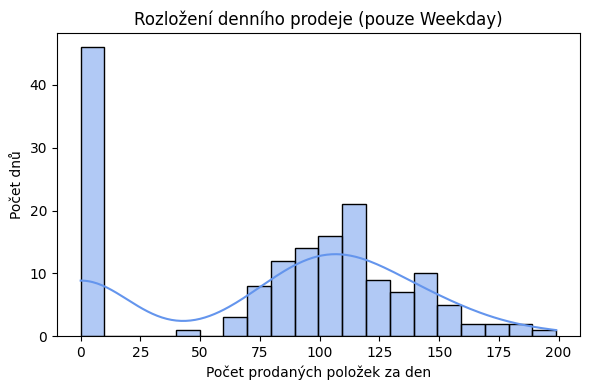

In [28]:
# === Histogram: rozložení denního prodeje během pracovních dnů ===
plt.figure(figsize=(6,4))
sns.histplot(weekday_data["Items"], bins=20, kde=True, color="cornflowerblue")
plt.title("Rozložení denního prodeje (pouze Weekday)")
plt.xlabel("Počet prodaných položek za den"); plt.ylabel("Počet dnů")
plt.tight_layout(); plt.show()

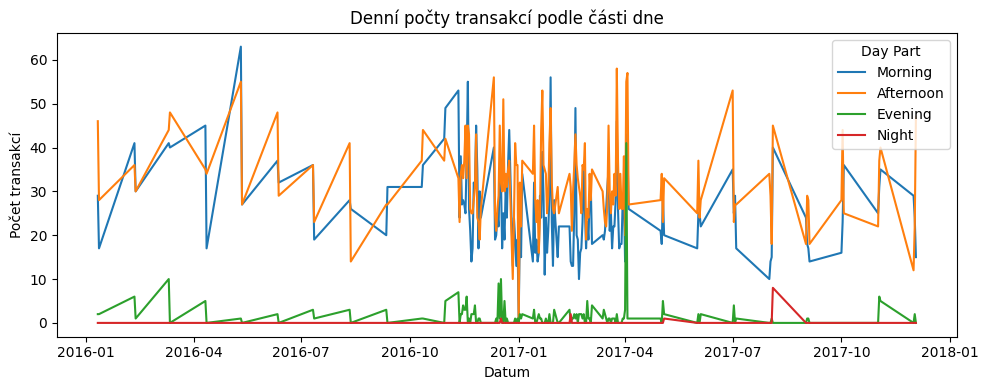

In [30]:
# === Lineplot: denní počty transakcí podle části dne ===
daypart_stats = daypart_statistics_daily.rename(columns={"Items":"Items_count", "TransactionNo":"Transactions"}).reset_index()

plt.figure(figsize=(10,4))
sns.lineplot(data=daypart_stats, x="Date", y="Transactions", hue="Day Part")
plt.title("Denní počty transakcí podle části dne")
plt.xlabel("Datum"); plt.ylabel("Počet transakcí")
plt.tight_layout(); plt.show()

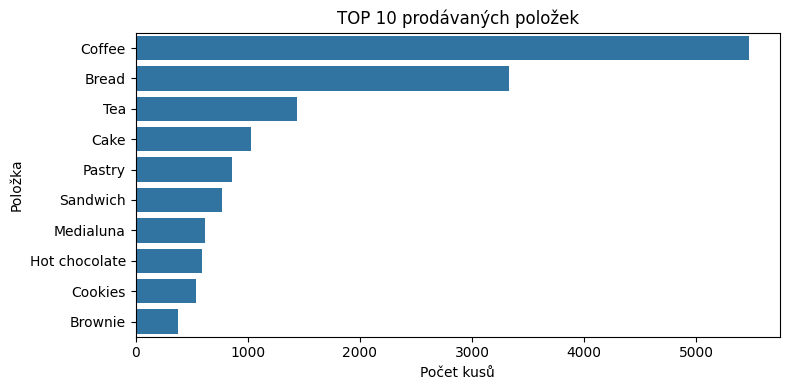

In [31]:
# === Barplot: TOP 10 produktů ===
top10 = bakery_data["Items"].value_counts().head(10).reset_index()
top10.columns = ["Items", "count"]

plt.figure(figsize=(8,4))
sns.barplot(data=top10, x="count", y="Items")
plt.title("TOP 10 prodávaných položek")
plt.xlabel("Počet kusů"); plt.ylabel("Položka")
plt.tight_layout(); plt.show()

/tmp/ipython-input-3921366373.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["Item Categories","Day Type"])


Text(0.5, 1.0, 'Kategorie produktů podle typu dne')

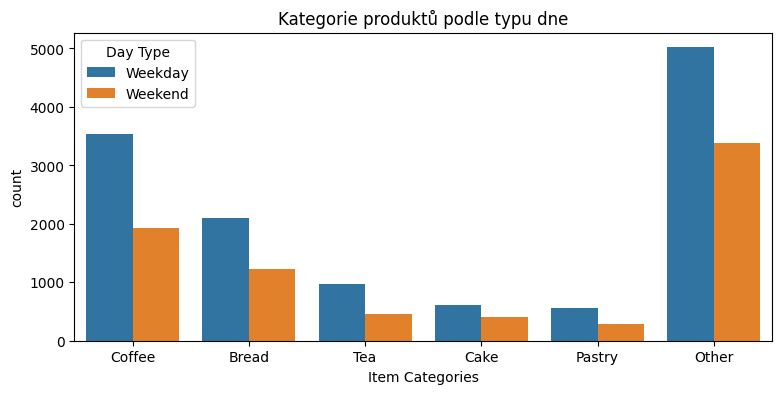

In [32]:
# === Grouped bar: Item Categories × Day Type ===
cat_day = (bakery_data
           .groupby(["Item Categories","Day Type"])
           .size()
           .reset_index(name="count"))

plt.figure(figsize=(9,4))
sns.barplot(data=cat_day, x="Item Categories", y="count", hue="Day Type")
plt.title("Kategorie produktů podle typu dne")

/tmp/ipython-input-4249072732.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["Day Part","Day Type"])["TransactionNo"]


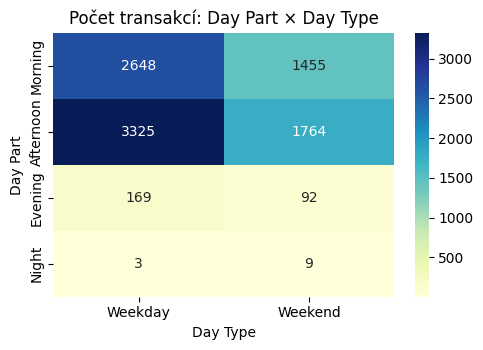

In [38]:
# === Heatmap: Day Part × Day Type ===
pivot_ht = (bakery_data
            .groupby(["Day Part","Day Type"])["TransactionNo"]
            .nunique()
            .unstack(fill_value=0).loc[["Morning","Afternoon","Evening","Night"]])

plt.figure(figsize=(5,3.6))
sns.heatmap(pivot_ht, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Počet transakcí: Day Part × Day Type")
plt.xlabel("Day Type"); plt.ylabel("Day Part")
plt.tight_layout(); plt.show()

<Axes: xlabel='Day Type', ylabel='Day Part'>

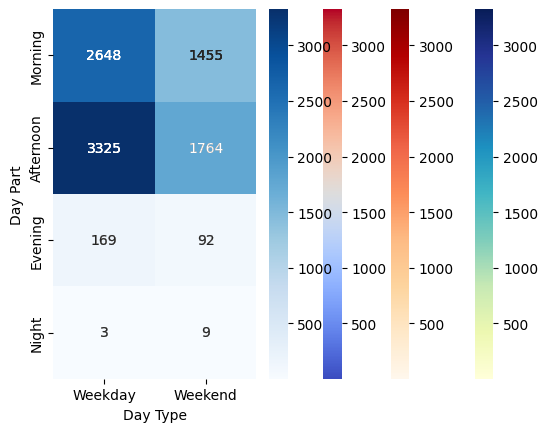

In [35]:
sns.heatmap(pivot_ht, annot=True, fmt="d", cmap="YlGnBu")   # zeleno-modrá
sns.heatmap(pivot_ht, annot=True, fmt="d", cmap="OrRd")     # oranžovo-červená
sns.heatmap(pivot_ht, annot=True, fmt="d", cmap="coolwarm") # modro-červený přechod
sns.heatmap(pivot_ht, annot=True, fmt="d", cmap="Blues")    # modré odstíny

<Axes: xlabel='Day Type', ylabel='Day Part'>

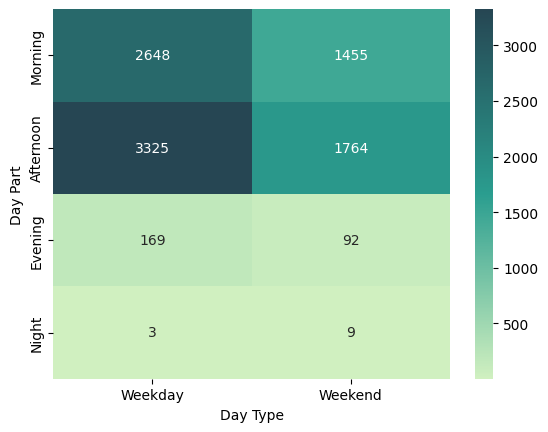

In [39]:
from matplotlib.colors import LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list("my_map", ["#d0f0c0", "#2a9d8f", "#264653"])
sns.heatmap(pivot_ht, annot=True, fmt="d", cmap=custom_cmap)

<Axes: xlabel='Day Type', ylabel='Day Part'>

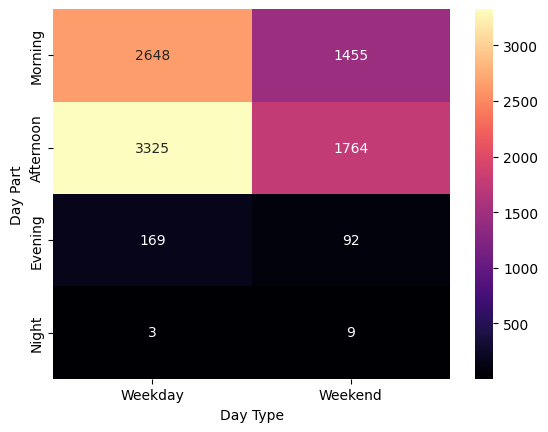

In [41]:
sns.heatmap(pivot_ht, annot=True, fmt="d", cmap="magma")

<Axes: xlabel='Day Type', ylabel='Day Part'>

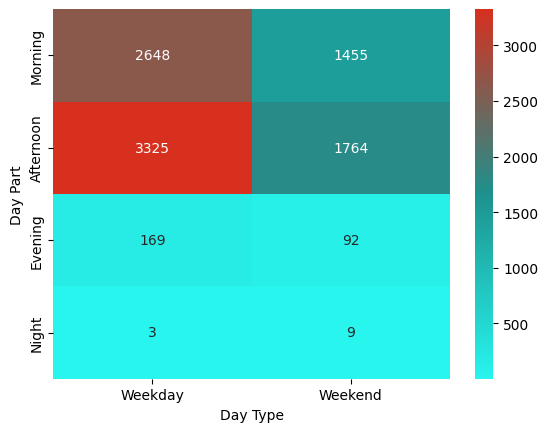

In [44]:
from matplotlib.colors import LinearSegmentedColormap

# vlastní přechod (od světle šedé přes oranžovou po tmavě červenou)
my_colors = ["#27F5EE", "#1D918D", "#d7301f"]
custom_cmap = LinearSegmentedColormap.from_list("custom", my_colors)

sns.heatmap(pivot_ht, annot=True, fmt="d", cmap=custom_cmap)

<Axes: xlabel='Day Type', ylabel='Day Part'>

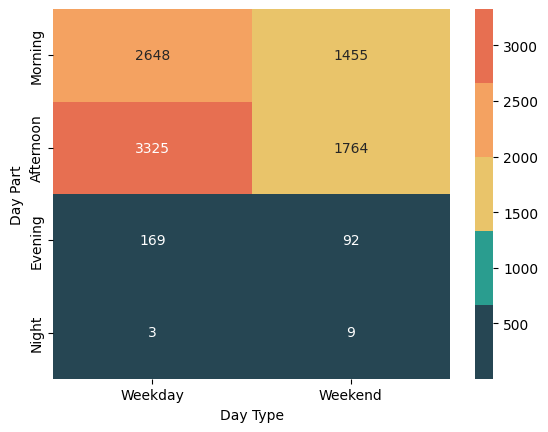

In [45]:
sns.heatmap(
    pivot_ht,
    annot=True,
    fmt="d",
    cmap=sns.color_palette(["#264653", "#2a9d8f", "#e9c46a", "#f4a261", "#e76f51"]),
)

<Axes: xlabel='Day Type', ylabel='Day Part'>

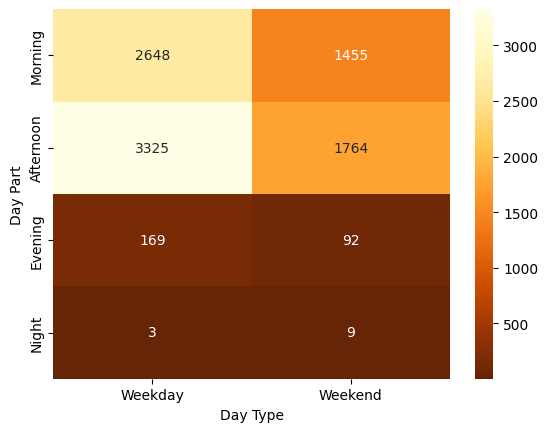

In [47]:
sns.heatmap(pivot_ht, annot=True, fmt="d", cmap="YlOrBr_r")  # "_r" = reversed

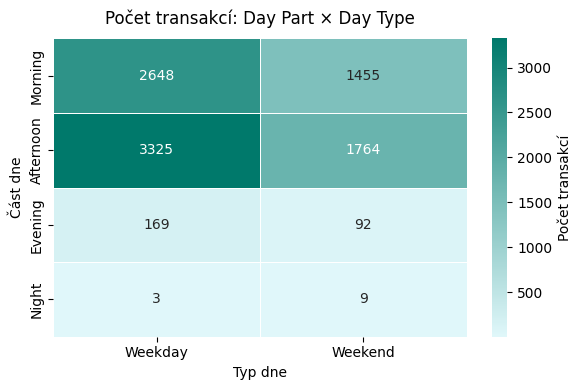

In [48]:
plt.figure(figsize=(6,4))
sns.heatmap(
    pivot_ht,
    annot=True, fmt="d",
    cmap=LinearSegmentedColormap.from_list("soft", ["#e0f7fa", "#00796b"]),
    linewidths=.4, cbar_kws={"label": "Počet transakcí"}
)
plt.title("Počet transakcí: Day Part × Day Type", pad=10)
plt.xlabel("Typ dne"); plt.ylabel("Část dne")
plt.tight_layout(); plt.show()